In [3]:
from splinter import Browser
from bs4 import BeautifulSoup as bs
import requests
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [5]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

In [6]:
browser.visit(url)

In [7]:
html = browser.html
soup = bs(html, 'html.parser')

In [8]:
results=soup.find_all("tr", class_="data-row")
print(results)

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

In [9]:
print(len(results))

1867


In [10]:
id_ = []
terrestrial_date = []
sol = []
ls = []
month = []
min_temp = []
pressure = []

In [11]:
for x in range (1867):
    cells = results[x].find_all("td")
    row_list = []
    for cell in cells:
        data = cell.text
        row_list.append(data)
    id_.append(row_list[0])
    terrestrial_date.append(row_list[1])
    sol.append(row_list[2])
    ls.append(row_list[3])
    month.append(row_list[4])
    min_temp.append(row_list[5])
    pressure.append(row_list[6])

In [12]:
mars_weather = pd.DataFrame({
    'id': id_,
    'terrestrial date': terrestrial_date,
    'sol': sol, 
    'ls': ls, 
    'month': month,
    'min temp': min_temp,
    'pressure': pressure
})

mars_weather.head()

,id,terrestrial date,sol,ls,month,min temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [13]:
print(type(mars_weather['id'][0]))
print(type(mars_weather['terrestrial date'][0]))
print(type(mars_weather['sol'][0]))
print(type(mars_weather['ls'][0]))
print(type(mars_weather['month'][0]))
print(type(mars_weather['min temp'][0]))
print(type(mars_weather['pressure'][0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [14]:
mars_weather['id'] = mars_weather['id'].astype(int)
mars_weather['terrestrial date'] = pd.to_datetime(mars_weather['terrestrial date'], format="%Y-%m-%d")
mars_weather['sol'] = mars_weather['sol'].astype(int)
mars_weather['ls'] = mars_weather['ls'].astype(int)
mars_weather['month'] = mars_weather['month'].astype(int)
mars_weather['min temp'] = mars_weather['min temp'].astype(float)
mars_weather['pressure'] = mars_weather['pressure'].astype(float)

In [15]:
# How many months exist on Mars?

months_max = mars_weather['month'].max()
# months
print(f"{months_max} months exist on mars.")

12 months exist on mars.


In [16]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?

martian_days = len(mars_weather['sol'].unique())
print(f"There are {martian_days} Martian days worth of data in the scraped dataset.")

There are 1867 Martian days worth of data in the scraped dataset.


The coldest month on Mars is month 3.
The warmest month on Mars is month 8.


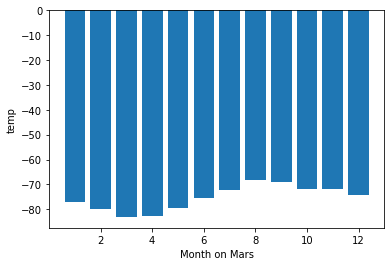

In [17]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)? 

mars_avg_weather_monthly = mars_weather.groupby("month").mean()
# mars_avg_weather_monthly
coldest_month = mars_avg_weather_monthly['min temp'].idxmin()
# coldest_month
print(f"The coldest month on Mars is month {coldest_month}.")

warmest_month = mars_avg_weather_monthly['min temp'].idxmax()
# warmest_month
print(f"The warmest month on Mars is month {warmest_month}.")

x = mars_avg_weather_monthly.index
height = mars_avg_weather_monthly['min temp']
plt.xlabel('Month on Mars')
plt.ylabel('temp')
plt.bar(x=x, height=height)
plt.show()

The month with the lowest atmospheric pressure on Mars is month 6.
The month with the highest atmospheric pressure on Mars is month 9.


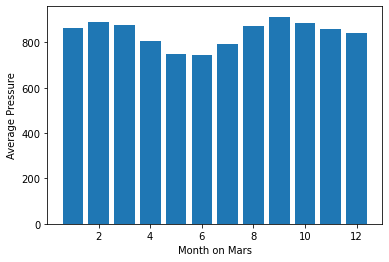

In [25]:
# Which months have the lowest and the highest atmospheric pressure on Mars?

lowest_pressure = mars_avg_weather_monthly['pressure'].min()
# lowest_pressure
lowest_pressure_month = mars_avg_weather_monthly['pressure'].idxmin()
# lowest_pressure_month
print(f"The month with the lowest atmospheric pressure on Mars is month {lowest_pressure_month}.")

highest_pressure = mars_avg_weather_monthly['pressure'].max()
# highest_pressure
highest_pressure_month = mars_avg_weather_monthly['pressure'].idxmax()
print(f"The month with the highest atmospheric pressure on Mars is month {highest_pressure_month}.")

x = mars_avg_weather_monthly.index
height = mars_avg_weather_monthly['pressure']
plt.xlabel('Month on Mars')
plt.ylabel('Average Pressure')
plt.bar(x=x, height=height)
plt.show()

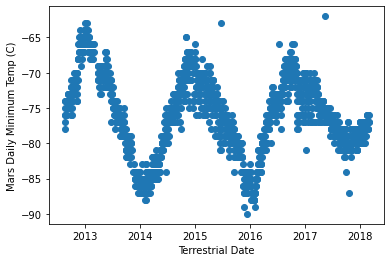

In [28]:
# About how many terrestrial (Earth) days exist in a Martian year? To answer this question:

x = mars_weather['terrestrial date']
y= mars_weather['min temp']
plt.xlabel('Terrestrial Date')
plt.ylabel('Mars Daily Minimum Temp (C)')
plt.scatter(x=x,y=y)

plt.show()

In [29]:
mars_weather.to_csv('mars_weather.csv', index=False)